In [1]:
from u_cmab import Fourier
from u_cmab import Static_UM
from u_cmab import plot_results
import simulation_code

import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylift import TransformedOutcome
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Collect data
Sudden drift at exp. no. 10000

In [2]:
sim = simulation_code.Simulation(D=2, std=0.2, drift_rate=2.5, sudden_drift=True, drift_moments=np.array([10000]), base_functions=np.array([simulation_code.Sine_Base(f=4), simulation_code.Sine_Base(f=5)]))

fourier = Fourier(sim, order=5)

epsilon = .1
alpha = .005

fourier_id, fourier_dm = fourier.run(epsilon, alpha, .2, 100, lifetime=20000)

# Train static uplift model with `pylift`
- `up_before`: training set `[0:7001]`, test set `[7001:20001]`
- `up_after`: training set `[10000:17001]`, test set `[17001:20001]`
- `up_before`: training set `[0:17001]`, test set `[17001:20001]`

In [3]:
up_before = TransformedOutcome((
    fourier.RP_run_history.iloc[:,0:4][0:7001], 
    fourier.RP_run_history.iloc[:,0:4][7001:10001]), 
    col_treatment='C', col_outcome='E', 
    stratify=None, 
    sklearn_model=RandomForestRegressor)
up_after = TransformedOutcome((
    fourier.RP_run_history.iloc[:,0:4][10000:17001], 
    fourier.RP_run_history.iloc[:,0:4][17001:20001]), 
    col_treatment='C', col_outcome='E', 
    stratify=None, 
    sklearn_model=RandomForestRegressor)
up_across = TransformedOutcome((
    fourier.RP_run_history.iloc[:,0:4][0:17001], 
    fourier.RP_run_history.iloc[:,0:4][17001:20001]), 
    col_treatment='C', col_outcome='E', 
    stratify=None, 
    sklearn_model=RandomForestRegressor)

In [4]:
up_before.randomized_search(
    param_distributions={'max_depth': range(2,100), 'min_samples_split': range(2,1000)}, 
    n_iter=50, n_jobs=10)
up_after.randomized_search(
    param_distributions={'max_depth': range(2,100), 'min_samples_split': range(2,1000)}, 
    n_iter=50, n_jobs=10)
up_across.randomized_search(
    param_distributions={'max_depth': range(2,100), 'min_samples_split': range(2,1000)}, 
    n_iter=50, n_jobs=10)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/jeroen/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    7.2s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   13.3s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:   15.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:    8.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   17.3s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:   23.0s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=10,
          param_distributions={'max_depth': range(2, 100), 'min_samples_split': range(2, 1000)},
          pre_dispatch='2*n_jobs', random_state=None, refit=False,
          return_train_score='warn', scoring=make_scorer(_cgains_score),
          verbose=3)

In [5]:
up_before.fit(**up_before.rand_search_.best_params_)
up_after.fit(**up_after.rand_search_.best_params_)
up_across.fit(**up_across.rand_search_.best_params_)

/Users/jeroen/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeroen/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeroen/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Noise fits

In [6]:
up_before.noise_fit(iterations=25)
up_after.noise_fit(iterations=25)
up_across.noise_fit(iterations=25)

# Plot results

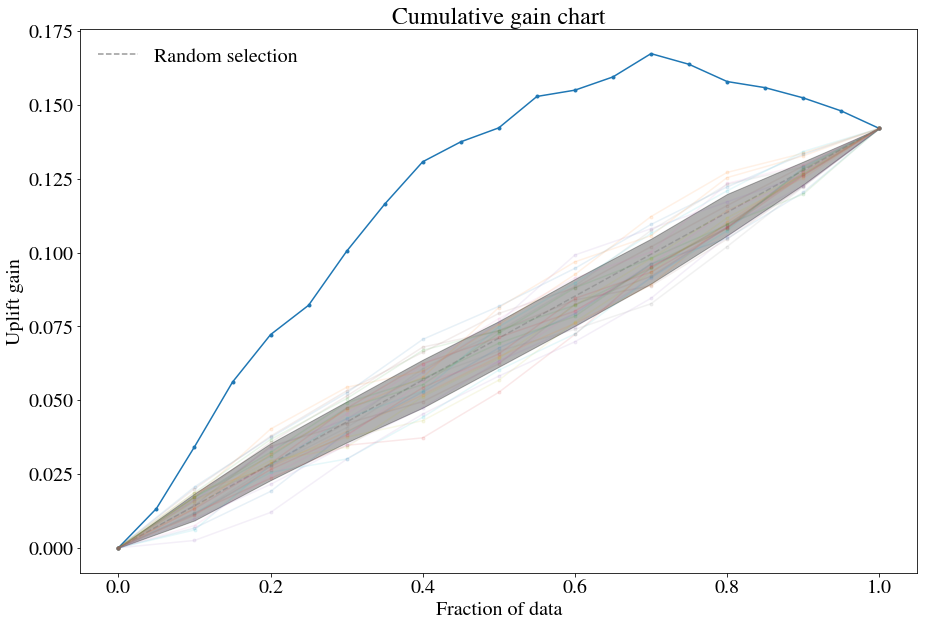

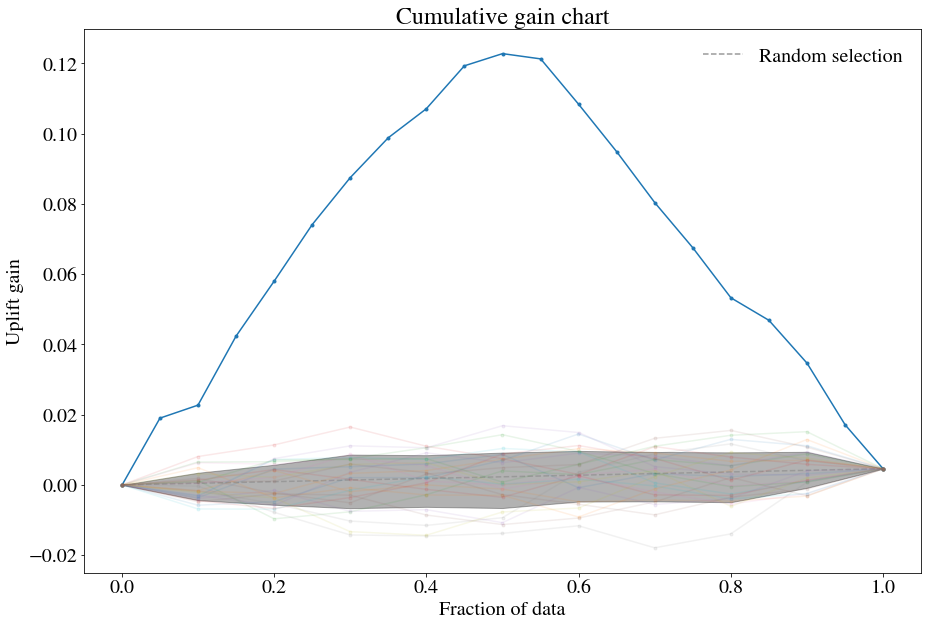

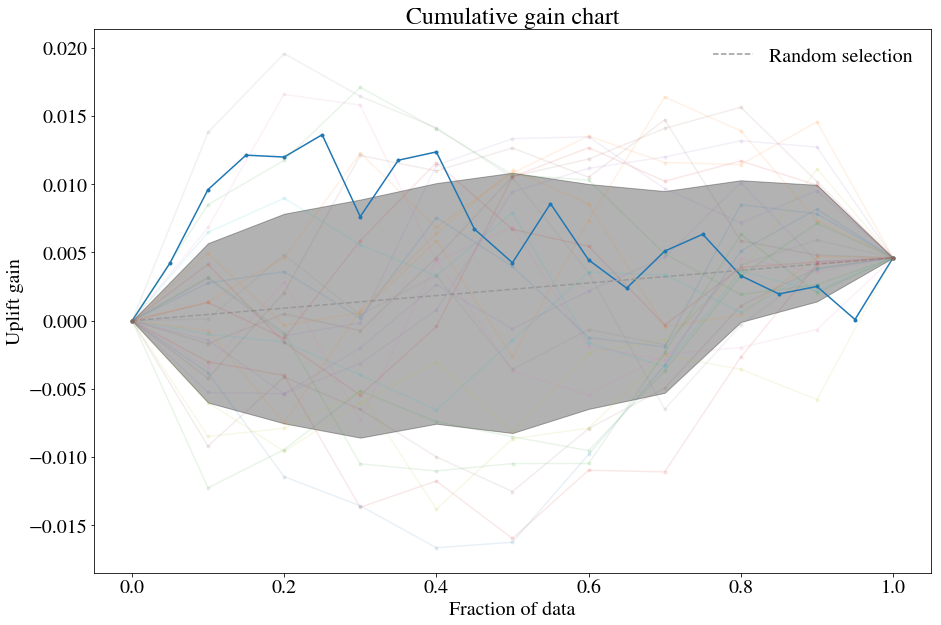

In [7]:
up_before.plot(show_noise_fits=True)
up_after.plot(show_noise_fits=True)
up_across.plot(show_noise_fits=True)